<a href="https://colab.research.google.com/github/Seeethy/Markowitz-portfolio-model-/blob/main/Markowitz_model_newest_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [950]:
# Libraries

import pandas_datareader.data as web
from datetime import date
import datetime
from dateutil.relativedelta import relativedelta
import itertools
import matplotlib.pyplot as plt
import pylab as plot
import numpy as np
import pandas as pd
import plotly.express as px 

In [951]:
# Typing shortnames of the companies. Numbers of the companies must be between 2 and 8.
# Suggested companies shortnames to try out:
# AAPL, MSFT, AMZN, GOOG,TSLA, FB, BABA, NVDA, EA,
# PYPL, INTC, CRM, AMD, ATVI, ZG, MTCH, TTD, YELP

companies = []
how_many = int(input("How many companies would you like to have in your portfolio?: "))
while True:
  if how_many >= 2 and how_many <= 8:
    for c in range(how_many):
      company = input("Type the shortname of the company (it must be searchable in yahoo finance):  ")
      companies.append(company)
    break
  else:
    print("You did type the number of companies which is out of range. Please type the number between 2 and 8: ")
    how_many = int(input("How many companies would you like to have in your portfolio?: "))
    continue

How many companies would you like to have in your portfolio?: 3
Type the shortname of the company (it must be searchable in yahoo finance):  PYPL
Type the shortname of the company (it must be searchable in yahoo finance):  CRM
Type the shortname of the company (it must be searchable in yahoo finance):  ATVI


In [952]:
# Two options of choosing the date

# 1) n years from today
today = date.today()
end_date = today.strftime("%Y-%m-%d")
two_years_from_today = date.today() - relativedelta(years=2)
start_date = two_years_from_today.strftime("%Y-%m-%d")
data_source= 'yahoo'

# 2) Writting exact date
start_date = "2016-11-01"
end_date = "2020-09-01"

data = web.DataReader(companies, data_source, start_date, end_date)
adj_close = data["Adj Close"]
index = adj_close.index

data

Attributes   Adj Close              ...      Volume            
Symbols           PYPL         CRM  ...         CRM        ATVI
Date                                ...                        
2016-11-01   41.540001   75.449997  ...   7141700.0  11286800.0
2016-11-02   41.349998   75.000000  ...   4084800.0   7792900.0
2016-11-03   41.189999   74.139999  ...   3883200.0  12822700.0
2016-11-04   40.900002   74.370003  ...   4280800.0  18751900.0
2016-11-07   41.279999   76.300003  ...   5977500.0  17854200.0
...                ...         ...  ...         ...         ...
2020-08-26  203.479996  272.320007  ...  63253400.0   7046400.0
2020-08-27  204.339996  276.320007  ...  22817100.0   4221300.0
2020-08-28  204.479996  271.100006  ...  28068000.0   4646700.0
2020-08-31  204.139999  272.649994  ...  16010100.0   6269500.0
2020-09-01  208.929993  281.250000  ...  13303200.0   5955100.0

[965 rows x 18 columns]

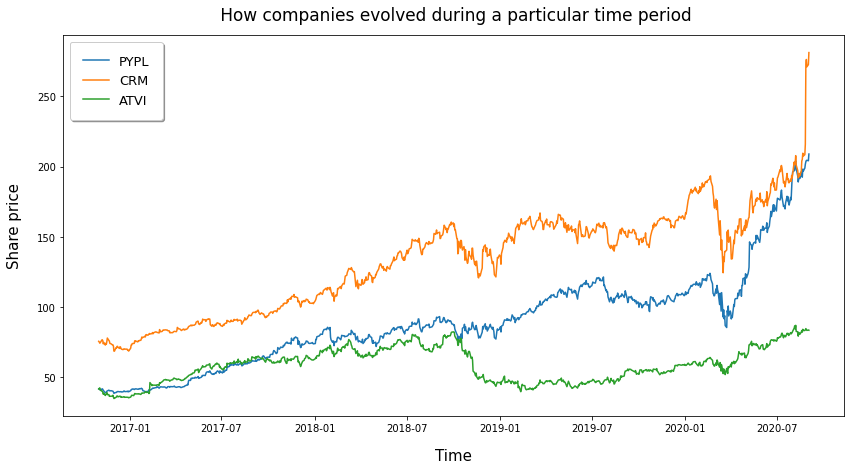

In [968]:

params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close)
plt.title(" How companies evolved during a particular time period",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Share price",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()

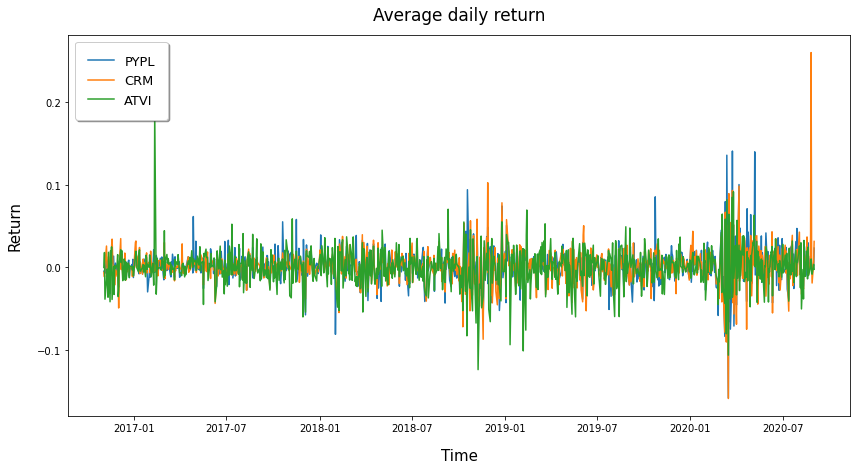

In [954]:
params = {'legend.fontsize': 13, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.figure(figsize=(14, 7))
plt.plot(index, adj_close.pct_change())
plt.title("Average daily return",fontsize=17, pad = 15)
plt.xlabel("Time",fontsize=15,labelpad=15)
plt.ylabel("Return",fontsize=15,labelpad=15)
plt.legend(companies, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 
plt.show()


In [955]:
#np.log(average daily return)
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns

Symbols,PYPL,CRM,ATVI
Date,,,
2016-11-01,NaN,NaN,NaN
2016-11-02,-0.004584,-0.005982,0.000000
2016-11-03,-0.003877,-0.011533,0.017914
2016-11-04,-0.007065,0.003097,-0.039267
2016-11-07,0.009248,0.025620,-0.014736
...,...,...,...
2020-08-26,0.008935,0.231468,0.010232
2020-08-27,0.004218,0.014582,-0.006889
2020-08-28,0.000685,-0.019072,-0.008258


In [956]:
# mean from average daily returns * trading days per year
log_returns.mean() * 252 

Symbols
PYPL    0.422268
CRM     0.343957
ATVI    0.182140
dtype: float64

In [957]:
# covariance from average daily returns * trading days per year
log_returns.cov() * 252

Symbols,PYPL,CRM,ATVI
Symbols,,,
PYPL,0.114902,0.077680,0.058876
CRM,0.077680,0.115382,0.058587
ATVI,0.058876,0.058587,0.130033


In [958]:
# correlation from average daily returns * trading days per year
log_returns.corr()

Symbols,PYPL,CRM,ATVI
Symbols,,,
PYPL,1.000000,0.674642,0.481671
CRM,0.674642,1.000000,0.478304
ATVI,0.481671,0.478304,1.000000


In [959]:
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

for x in range(10000):
    weights = np.random.random(len(companies))
    weights /= np.sum(weights)

    portfolio_weights.append(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 252)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 252, weights))))
                    
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

data_transposed = zip(portfolio_weights)
weights_in_dataframe = pd.DataFrame(data_transposed,columns=["Weights"])

co = companies

if len(companies) == 2: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2" ])
if len(companies) == 3: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3" ])
if len(companies) == 4: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4" ])
if len(companies) == 5: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4", "Weight5" ])
if len(companies) == 6: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4] , "Weight6: " + co[5]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4", "Weight5", "Weight6" ])
if len(companies) == 7: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4] , "Weight6: " + co[5], "Weight7: " + co[6]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4", "Weight5", "Weight6", "Weight7" ])
if len(companies) == 8: 
  weights_in_dataframee = pd.DataFrame(portfolio_weights,columns=["Weight1: " + co[0], "Weight2: " + co[1],"Weight3: " + co[2], "Weight4: " + co[3], "Weight5: " + co[4] , "Weight6: " + co[5], "Weight7: " + co[6],  "Weight8: " + co[7]])
  weights_in_dataframeee = pd.DataFrame(portfolio_weights,columns=["Weight1" , "Weight2", "Weight3", "Weight4", "Weight5", "Weight6", "Weight7", "Weight8" ])


weights_in_dataframeee

,Weight1,Weight2,Weight3
0,0.469262,0.140606,0.390132
1,0.307425,0.325440,0.367135
2,0.166526,0.206641,0.626833
3,0.483865,0.127221,0.388914
4,0.415207,0.151596,0.433197
...,...,...,...
9995,0.651976,0.276468,0.071556
9996,0.580916,0.385753,0.033331
9997,0.652393,0.018422,0.329185
9998,0.161469,0.447484,0.391046


In [974]:
fig = px.scatter(x = portfolio_volatilities, y = portfolio_returns, width=1200, height=750, hover_data=[weights_in_dataframe],
                 labels={'x': "Expected Volatility", 'y': "Expected Return",'hover_data_0': "Weights"})
fig.update_traces(marker=dict(size = 2))
fig.show()  

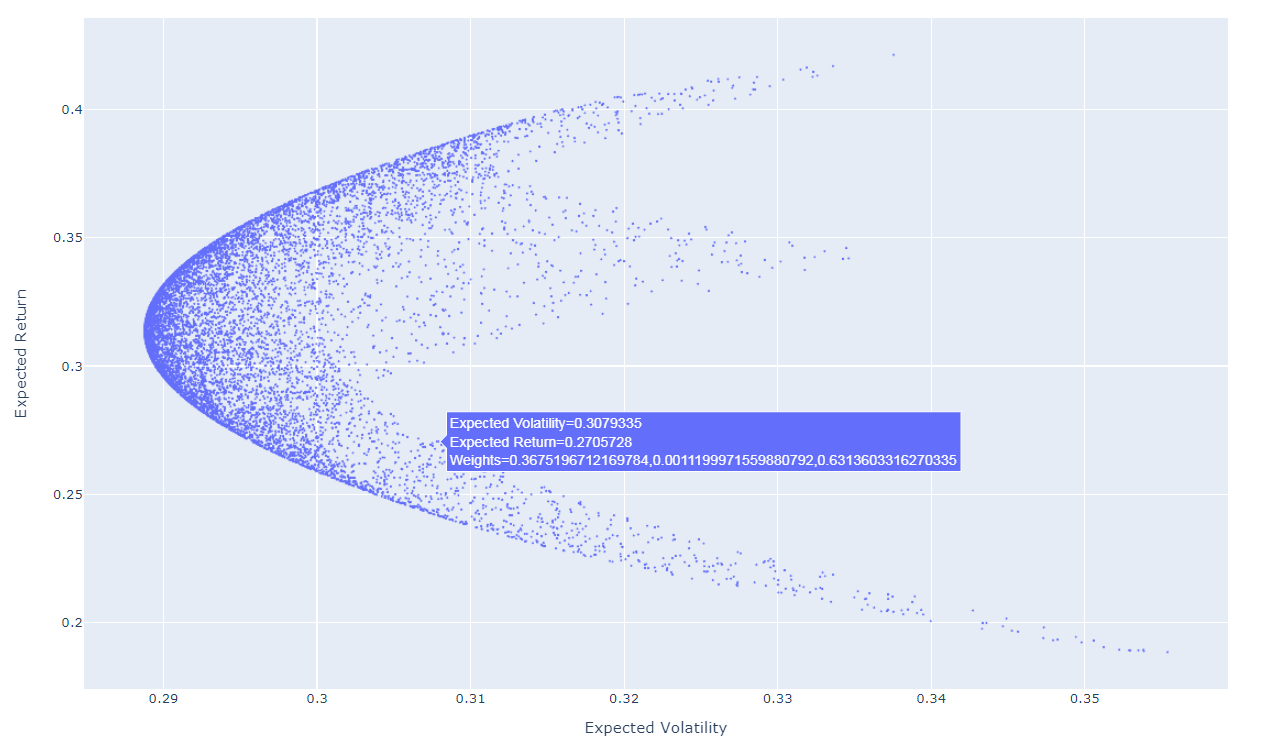

In [961]:
# minimum volatility portfolio

d = {'Volatility':portfolio_volatilities,'Returns':portfolio_returns}

m_v_p = pd.DataFrame(d)
m_v_p.reset_index(drop=True, inplace=True)

weights_in_dataframee.reset_index(drop=True, inplace=True)
 
portfolio = pd.concat([m_v_p,weights_in_dataframee],axis=1)

minimum = portfolio.loc[portfolio['Volatility'] == min(portfolio['Volatility'])]
mini = minimum[minimum.columns[0:2]]

print("The minimum volatility portfolio contains: \n")
minimum.iloc[0]

The minimum volatility portfolio contains: 



Volatility       0.288762
Returns          0.313357
Weight1: PYPL    0.326337
Weight2: CRM     0.326633
Weight3: ATVI    0.347030
Name: 1277, dtype: float64

In [962]:
# optimal risk portfolio

opt_risk = portfolio.iloc[((portfolio['Returns']) / portfolio['Volatility']).idxmax()]
print("The optimal risk portfolio contains: \n")
print(opt_risk)


The optimal risk portfolio contains: 

Volatility       0.316568
Returns          0.400871
Weight1: PYPL    0.735947
Weight2: CRM     0.259613
Weight3: ATVI    0.004441
Name: 6152, dtype: float64


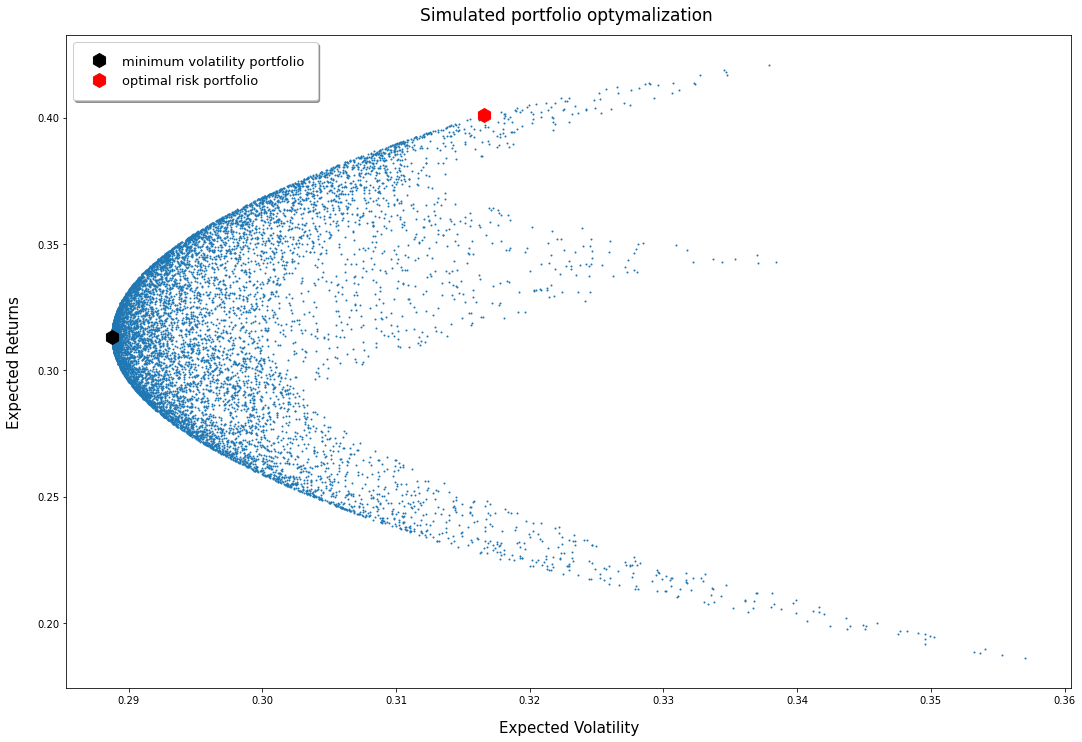

In [963]:
plt.scatter(portfolio_volatilities,portfolio_returns,s = 1)
plt.rcParams["figure.figsize"] = (18, 12)
plt.plot(mini['Volatility'],mini['Returns'],'h',color = 'black',markersize = 14)
plt.plot(opt_risk['Volatility'],opt_risk['Returns'],'h',color = 'red',markersize = 14)
legend_labels = ["minimum volatility portfolio", "optimal risk portfolio" ]
plt.title("Simulated portfolio optymalization ",fontsize=17, pad = 15)
plt.xlabel("Expected Volatility",fontsize=15,labelpad=15)
plt.ylabel("Expected Returns",fontsize=15,labelpad=15)
plt.legend(legend_labels, loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1) 

plt.show()